In [1]:
import numpy as np
import AR
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["axes.labelpad"] = -1.7


# フーリエ変換

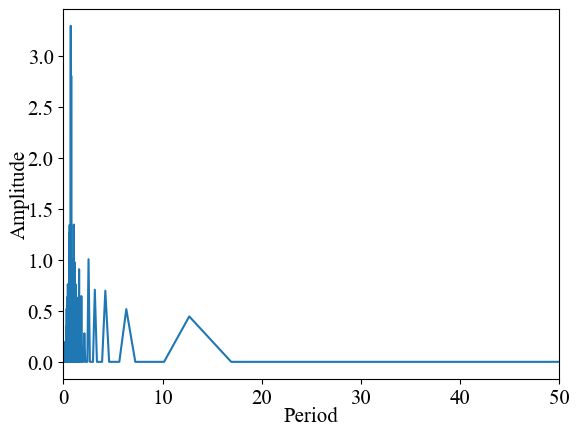

Top 10 periods:  [50.76       25.38       16.92       12.69       10.152       8.46
  7.25142857  6.345       5.64        5.076       4.61454545  4.23
  3.90461538  3.62571429  3.384       3.1725      2.98588235  2.82
  2.67157895  2.538       2.41714286  2.30727273  2.20695652  2.115
  2.0304      1.95230769  1.88        1.81285714  1.75034483  1.692
  1.63741935  1.58625     1.53818182  1.49294118  1.45028571  1.41
  1.37189189  1.33578947  1.30153846  1.269       1.23804878  1.20857143
  1.18046512  1.15363636  1.128       1.10347826  1.08        1.0575
  1.03591837  1.0152      0.99529412  0.97615385  0.95773585  0.94
  0.92290909  0.90642857  0.89052632  0.87517241  0.86033898  0.846
  0.83213115  0.81870968  0.80571429  0.793125    0.78092308  0.76909091
  0.75761194  0.74647059  0.73565217  0.72514286  0.71492958  0.705
  0.69534247  0.68594595  0.6768      0.66789474  0.65922078  0.65076923
  0.64253165  0.6345      0.62666667  0.61902439  0.61156627  0.60428571
  0.59717647  0

In [60]:
fname = "../lorenz/dat-upo-T12.692183z-periodic.npy"
data =  np.load(fname)
dt = 0.01

# 横軸に周期、縦軸に振幅を持つグラフの作成とプロット
data_fft = np.fft.fft(data)
amplitude = np.abs(data_fft/data.size)[1:] # 振幅
freq = np.fft.fftfreq(data.size, d=dt)[1:] # 周波数
# 周期に変換
period = 1/freq
# グラフの作成
plt.plot(period, amplitude)
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.xlim(0, 50)
# plt.ylim(0, 100)
plt.show()

# 振幅が大きい上位10個の周期を表示
top1000 = np.argsort(period)[::-1][:1000]
print("Top 10 periods: ", period[top1000])

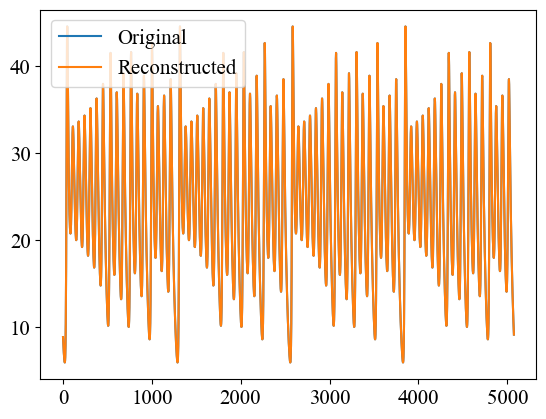

In [64]:
# 上で得られた全てのもので時系列データを再構成
reconstructed = np.zeros_like(data)
# for i in top1000:
#     reconstructed += amplitude[i] * np.cos(2*np.pi*freq[i]*dt*np.arange(data.size) + np.angle(np.fft.fft(data))[i])

# 時系列データのプロット
plt.plot(data, label="Original")
plt.plot(reconstructed, label="Reconstructed")
# plt.plot(np.real(np.fft.ifft(data_fft)), label="Reconstructed")
plt.legend()
plt.show()

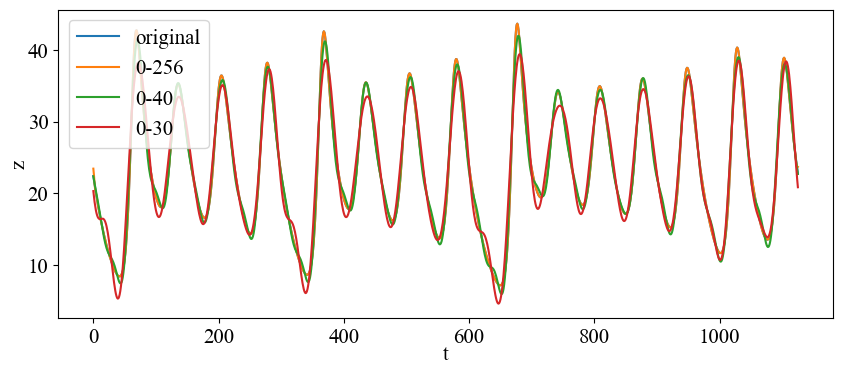

In [ ]:
#フーリエ変換で打ち切りがどれだけ影響するか
plt.figure(figsize=(10, 4))
plt.plot(np.loadtxt("../lorenz-upos/dat-upo-T11.256767143036276z-periodic")[::10, 1], label="original")
plt.plot(np.loadtxt("../lorenz-upos/dat-upo-T11.256767143036276z-periodic-fourier-sum0-256")[::10, 1], label="0-256")
plt.plot(np.loadtxt("../lorenz-upos/dat-upo-T11.256767143036276z-periodic-fourier-sum0-40")[::10, 1], label="0-40")
plt.plot(np.loadtxt("../lorenz-upos/dat-upo-T11.256767143036276z-periodic-fourier-sum0-30")[::10, 1], label="0-30")
plt.xlabel("t")
plt.ylabel("z")
plt.legend()

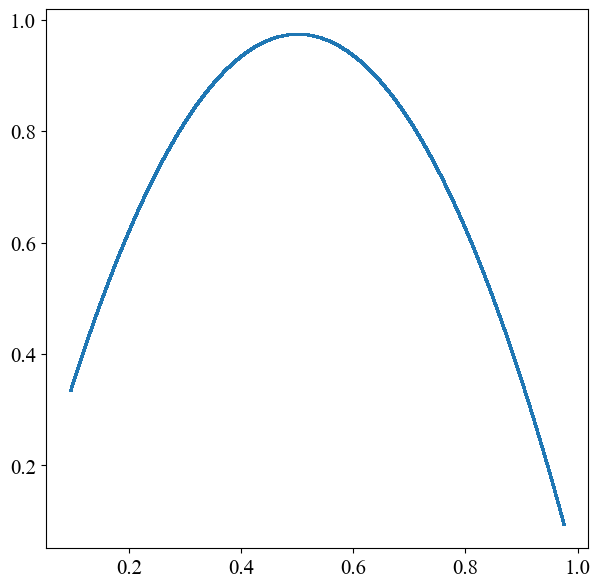

In [ ]:
lo = np.load("../logistic/logistic_3.9_1000000_10000dumped.npy")

plt.figure(figsize=(7, 7))
plt.scatter(lo[:-1], lo[1:], s=1)